# Predicting Heart Disease Using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleveland database from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+Disease).
There is also a version of it available on [Kaggle](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset).

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

**Create Data Dictionary**

* age: Displays the age of the individual.
* sex: Displays the gender of the individual using the following format : 1 = male 0 = female
* cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 
    - 0 = typical angina
    - 1 = atypical angina
    - 2 = non — anginal pain
    - 3 = asymptotic
* trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.
* chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)
* fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes
* restecg- Resting ECG : displays resting electrocardiographic results 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy
* thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.
* exang- Exercise induced angina : 1 = yes 0 = no
* oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.
* slope- Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart
* ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.
* thal : Displays the thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising
* target : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no

## Note: Code update for next video

Hey, it's Daniel here,

Massive effort on making it to your first milestone project!

Just a quick note on the code in the upcoming video.

As of Scikit-Learn version 1.2+, `plot_roc_curve` is now `RocCurveDisplay`, you can see the documentation for this [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn-metrics-roccurvedisplay).

This means if you're running Scikit-Learn version 1.2+, you'll see an error if you try to run `plot_roc_curve`.

**Previous code (before Scikit-Learn version 1.2)**

> \# this will error in Scikit-Learn version 1.2+   
from sklearn.metrics import plot_roc_curve 

**New code (after Scikit-Learn version 1.2)**

> \# Available in Scikit-Learn version 1.2+   
from sklearn.metrics import RocCurveDisplay 

**How to check what Scikit-Learn version you're running**

> import sklearn   
sklearn.__version__ \# will print out the version number

**How to update your Scikit-Learn version**

Running this in your terminal with your Conda environment active will update Scikit-Learn to latest version (the -U stands for update).

`pip install -U scikit-learn`

**More details**

You can see more details about this on the course [GitHub](https://github.com/mrdbourke/zero-to-mastery-ml/issues/45).

Happy machine learning!

## Preparing the tools

We're going to use pandas, matplotlib and NumPy for data analysis and manipulation.

In [6]:
# Import all the tools we need

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# plot_roc_curve was replaced by RocCurveDisplay starting with sklearn 1.2+
from sklearn.metrics import RocCurveDisplay

## Load Data

In [10]:
df = pd.read_csv("data/heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

## Data Exploration (Exploratory Data Analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
df.target.value_counts() # 165 examples with subjects having heart disease

1    165
0    138
Name: target, dtype: int64

In [17]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

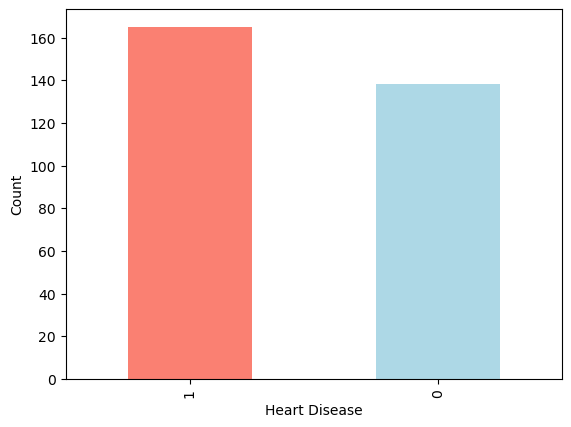

In [42]:
df["target"].value_counts().plot(kind="bar", 
                                 color=["salmon", "lightblue"],
                                 xlabel="Heart Disease",
                                 ylabel="Count",
                                );

In [31]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [32]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [46]:
df.sex.value_counts() # alot more male (207) to female (96) in our dataset

1    207
0     96
Name: sex, dtype: int64

In [47]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [50]:
# 72 out of 96 women in our dataset have heart disease (HD) (roughly 75%)
# 93 out of 207 men in our dataset have HD (roughly 45%)
# based on the sex groups HD % we deduce that 60% of anyone has HD

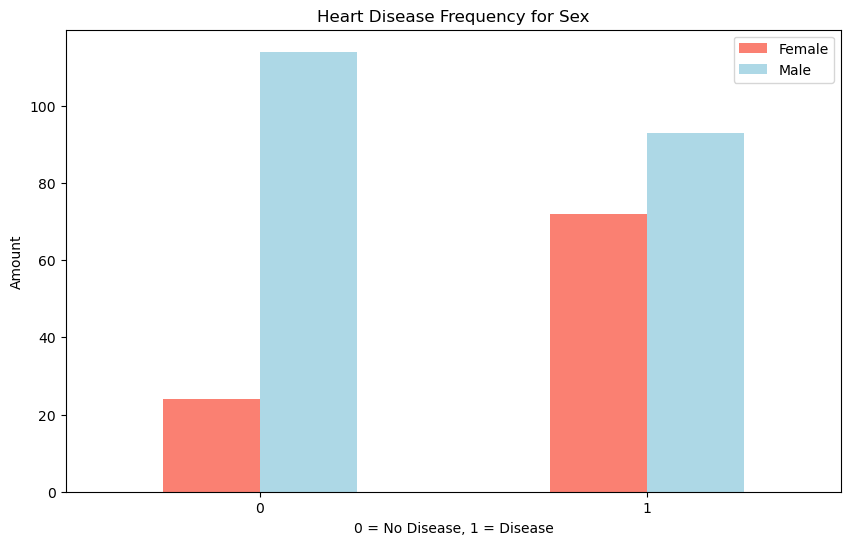

In [63]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"],
#                                     xlabel="Heart Disease",
#                                     ylabel="Count",
                                   );
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Age vs. Talach (Max Heart Rate) for Heart Disease

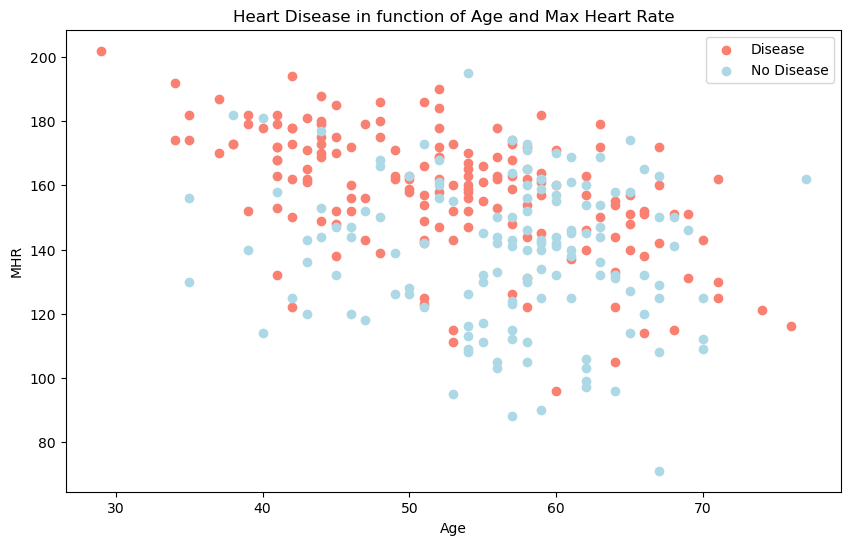

In [70]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon",
           );

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue",
           );

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("MHR")
plt.legend(["Disease", "No Disease"]);

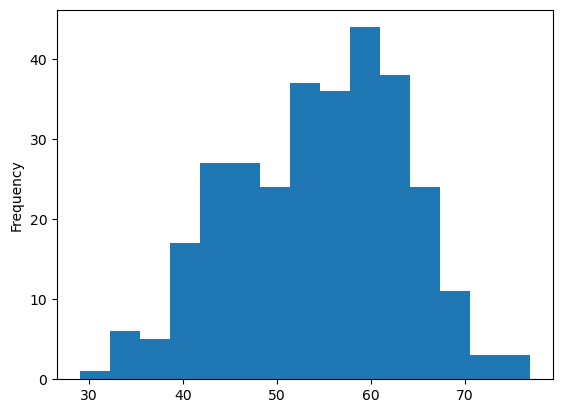

In [75]:
# Check the distribution of the age column with a histogram
df.age.plot.hist(bins=15);

In [78]:
# Our distribution is a normal distribution, but leaned to the right
df.age.mean()

54.366336633663366

### Heart Disease Frequency per Chest Pain (CP) Type

* cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 
    - 0 = typical angina
    - 1 = atypical angina
    - 2 = non — anginal pain
    - 3 = asymptotic

In [79]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


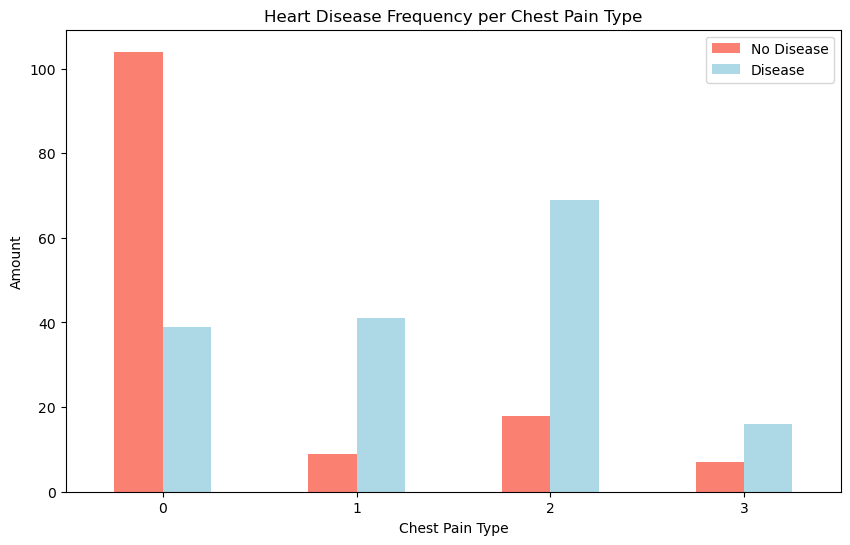

In [80]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"]
                                  )

# Add some communication
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [81]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [82]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


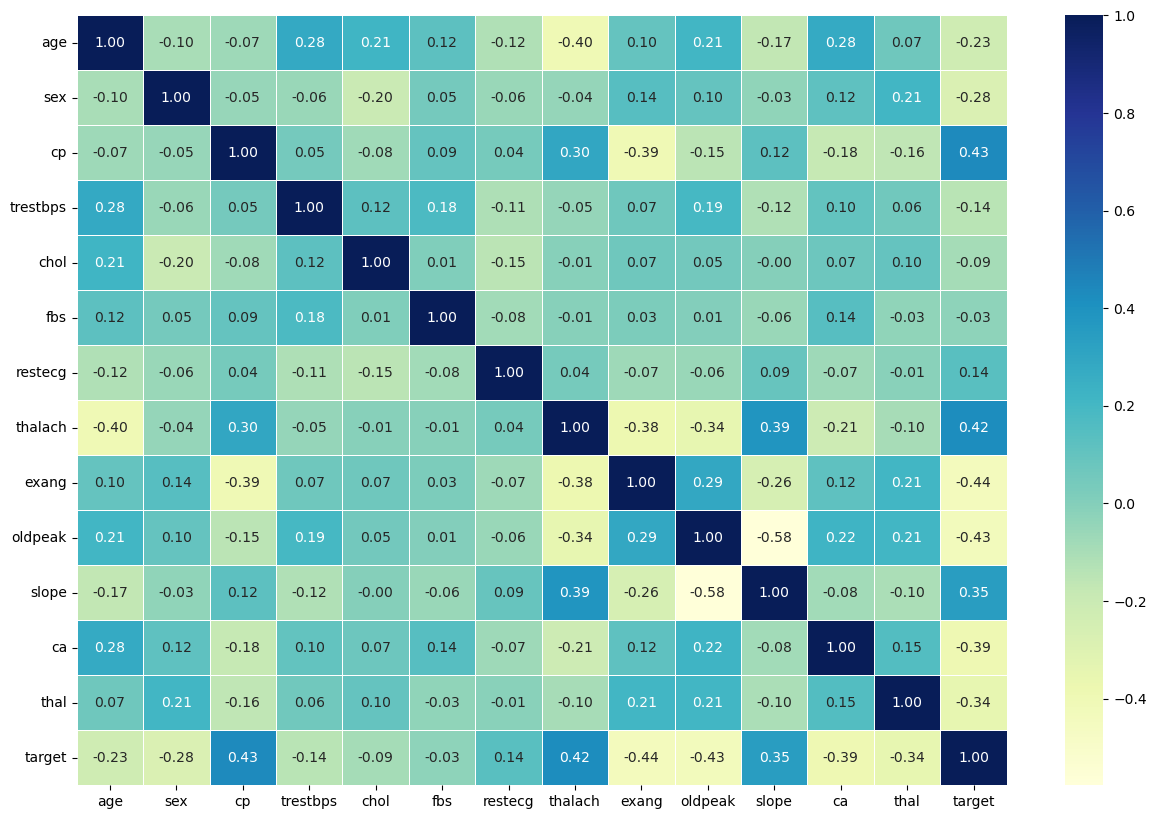

In [88]:
# Let's make our correlation matrix a little prettier using seaborn (sns)
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu",
                );
plt.yticks(rotation=0);
# # Optional code if we get overlaps on the plot
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)